# World happiness data across years

In [18]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
from dash import Dash, html, dcc, callback, Output, Input
import dash_bootstrap_components as dbc

### Dataframe explorations

In [5]:
df_05_to_20 = pd.read_csv('datafiles/world-happiness-report-2005-2020.csv')

In [6]:
df_05_to_20

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [7]:
len(df_05_to_20['Country name'].unique())

166

In [8]:
df_2021 = pd.read_csv('datafiles/world-happiness-report-2021.csv')

In [9]:
df_2022 = pd.read_csv('datafiles/World Happiness Report 2022.csv')

In [10]:
df_2023 = pd.read_csv('datafiles/WHR2023.csv')

In [12]:
df_05_to_20_columns = df_05_to_20.columns
df_2021_columns = df_2021.columns
df_2022_columns = df_2022.columns
df_2023_columns = df_2023.columns

In [13]:
df_05_to_20_columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [14]:
df_2021_columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

### Default dataframe: 2005 - 2022 with some nulls

In [62]:
df_05_22 = pd.read_csv('datafiles/regional20052022.csv')

In [16]:
len(df_05_22['Country Name'].unique())

165

In [17]:
list(df_05_22['Year'].unique())

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2021,
 2022,
 2007,
 2020,
 2006,
 2005]

### Default dataframe + 2023 (although lacking some data)

In [20]:
df_2023.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [21]:
df_05_22.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [32]:
df_05_22_renamed = df_05_22.rename(columns={
    'Country Name' : 'Country name',
    'Life Ladder' : 'Ladder score',
    'Log GDP Per Capita': 'Logged GDP per capita',
    'Social Support': 'Social support',
    'Healthy Life Expectancy At Birth': 'Healthy life expectancy',
    'Freedom To Make Life Choices': 'Freedom to make life choices',
    'Perceptions Of Corruption': 'Perceptions of corruption',
})

In [28]:
unified_columns = ['Country name', 'Ladder score', 'Logged GDP per capita',
                  'Social support', 'Healthy life expectancy',
                  'Freedom to make life choices', 'Perceptions of corruption', 'Year',
                  'Regional Indicator']

In [26]:
combined_2023_df = pd.read_csv('datafiles/combined_df_2023.csv', index_col=0)

In [27]:
combined_2023_df.columns

Index(['Country', 'Ladder score', 'Ladder score standard error',
       'Ladder score upper whisker', 'Ladder score lower whisker',
       'Logged GDP per capita', 'Social support', 'Life expectancy', 'Freedom',
       'Generosity', 'Corruption perception', 'Political regime',
       'Density (P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions',
       'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Maternal mortality ratio', 'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'Regional Indicator', 'Starting a Business rank', 'Business days Men',
       'Business days Women', 'Agriculture', 'Industry', 'Service

In [29]:
combined_2023_df['Year'] = 2023

In [41]:
df_2023_renamed = combined_2023_df.rename(columns={
    'Country' : 'Country name',
    'Life expectancy': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Corruption perception': 'Perceptions of corruption',
})

In [33]:
df_05_22_uni = df_05_22_renamed[[*unified_columns]]

In [42]:
df_23_uni = df_2023_renamed[[*unified_columns]]

In [51]:
df_05_23 = pd.concat([df_05_22_uni, df_23_uni], axis=0)

In [52]:
df_05_23

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Year,Regional Indicator
0,Afghanistan,3.723590,7.350416,0.450662,50.500000,0.718114,0.881686,2008,South Asia
1,Afghanistan,4.401778,7.508646,0.552308,50.799999,0.678896,0.850035,2009,South Asia
2,Afghanistan,4.758381,7.613900,0.539075,51.099998,0.600127,0.706766,2010,South Asia
3,Afghanistan,3.831719,7.581259,0.521104,51.400002,0.495901,0.731109,2011,South Asia
4,Afghanistan,3.782938,7.660506,0.520637,51.700001,0.530935,0.775620,2012,South Asia
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207000,7.007000,0.652000,55.375000,0.664000,0.834000,2023,NaN
133,Zimbabwe,3.204000,7.641000,0.690000,54.050000,0.654000,0.766000,2023,Sub-Saharan Africa
134,Sierra Leone,3.138000,7.394000,0.555000,54.900000,0.660000,0.858000,2023,Sub-Saharan Africa
135,Lebanon,2.392000,9.478000,0.530000,66.149000,0.474000,0.891000,2023,Middle East and North Africa


In [53]:
df_05_23['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2022, 2007, 2020, 2006, 2005, 2023], dtype=int64)

In [54]:
df_05_23.to_csv('datafiles/world-05-23-unified.csv')

### Up to 2022 explorations
df_05_22

In [63]:
df_05_22.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [75]:
df_05_22.sample(5)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
1354,Myanmar,Southeast Asia,2021,4.314040,8.302173,0.779576,61.549999,0.631394,0.511372,0.671063,0.636049,0.267806,0.305713
1472,North Macedonia,Central and Eastern Europe,2022,5.166882,9.733425,0.849509,66.699997,0.723089,0.071887,0.937215,0.554965,0.277091,NaN
128,Bahrain,Middle East and North Africa,2016,6.169673,10.789037,0.862700,66.125000,0.888691,0.083302,NaN,0.736220,0.283466,NaN
1406,New Zealand,North America and ANZ,2017,7.327183,10.650615,0.954921,70.050003,0.942279,0.288717,0.221887,0.762818,0.171717,0.609015
1655,Saudi Arabia,Middle East and North Africa,2013,6.495133,10.729292,0.826695,62.799999,0.661042,-0.082016,NaN,0.691166,0.275550,NaN


C:\Users\User\Desktop\programowanie_web_etc\python_projects\data_projects\venv\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




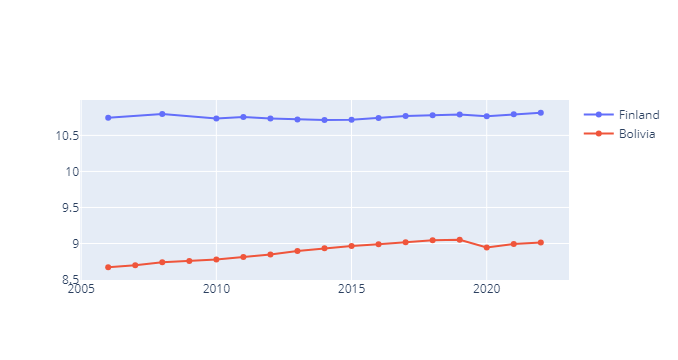

In [76]:
gdp_year_fig = go.Figure()
gdp_year_fig.add_trace(
    go.Line(
        x=df_05_22.query("`Country Name` == 'Finland'")['Year'],
        y=df_05_22.query("`Country Name` == 'Finland'")['Log GDP Per Capita'],
        name='Finland'
    )
)

gdp_year_fig.add_trace(
    go.Line(
        x=df_05_22.query("`Country Name` == 'Bolivia'")['Year'],
        y=df_05_22.query("`Country Name` == 'Bolivia'")['Log GDP Per Capita'],
        name='Bolivia'
    )
)

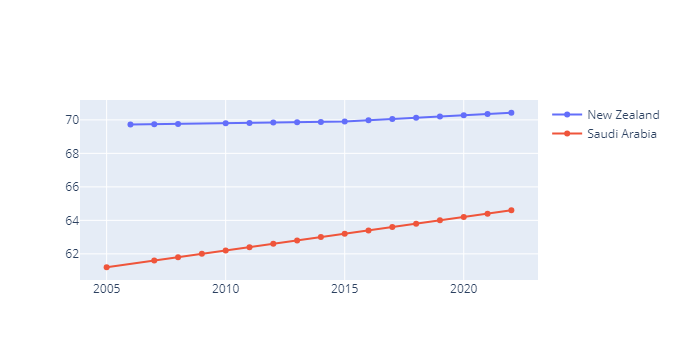

In [78]:
life_year_fig = go.Figure()
life_year_fig.add_trace(
    go.Line(
        x=df_05_22.query("`Country Name` == 'New Zealand'")['Year'],
        y=df_05_22.query("`Country Name` == 'New Zealand'")['Healthy Life Expectancy At Birth'],
        name='New Zealand'
    )
)

life_year_fig.add_trace(
    go.Line(
        x=df_05_22.query("`Country Name` == 'Saudi Arabia'")['Year'],
        y=df_05_22.query("`Country Name` == 'Saudi Arabia'")['Healthy Life Expectancy At Birth'],
        name='Saudi Arabia'
    )
)

## App

In [224]:
app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

### Metric per year for country in region

In [225]:
regions = list(df_05_22['Regional Indicator'].dropna().unique())

In [226]:
regions

['South Asia',
 'Central and Eastern Europe',
 'Middle East and North Africa',
 'Latin America and Caribbean',
 'Commonwealth of Independent States',
 'North America and ANZ',
 'Western Europe',
 'Sub-Saharan Africa',
 'Southeast Asia',
 'East Asia']

In [227]:
metrics = [
    'Life Ladder', 'Log GDP Per Capita', 'Social Support',
    'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
    'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
    'Negative Affect', 'Confidence In National Government'
]

#### choose metric, region and countries and display for each year 

In [228]:
metric_year_country_controls = dbc.Card(
    [
        html.Div(
            [
            dbc.Label("Region"),
            dcc.Dropdown(
                id='metric-year-region-selection',
                value = ['Western Europe',],
                options = regions,
                multi = True
            )
            ]),
        html.Div(
            [
            dbc.Label("Country"),
            dcc.Dropdown(
                id='metric-year-country-selection',
                multi=True
            )
            ]),
        html.Div(
            [
            dbc.Label("Metric"),
            dcc.Dropdown(
                id='metric-year-metric-selection',
                value = 'Life Ladder',
                options = metrics
            )
            ]),
        # html.Div(
        #     [
        #     dbc.Label("Year"),
        #     dcc.Slider(
        #         2005, 2022, 1,
        #         value = 2005,
        #         id='metric-year-year-selection',
        #     )
        #     ]),
    ],
    body=True,
)

In [229]:
metric_year_country_container = dbc.Container([
    html.H1(children = 'Metric for chosen year and country within region', style={'textAlign': 'center'}),
    html.P(id='metric-year-country-shape'),
    dbc.Row(
        [
            dbc.Col(metric_year_country_controls, md=4),
            dbc.Col(dcc.Graph(id='metric-year-country-graph'), md=8),
        ],
        align="center",
    ),
], fluid=True)

In [230]:
@app.callback(
    [
        Output('metric-year-country-graph', 'figure'),
        Output('metric-year-country-shape', 'children'),
    ],
    [
        Input('metric-year-country-selection', 'value'),
        Input('metric-year-metric-selection', 'value'),
        # Input('metric-year-year-selection', 'value'),
    ]
)
def update_metric_year_country_graph(countries, metric):
    fig = go.Figure()

    for country in countries:
        country_df = df_05_22[df_05_22['Country Name'] == country]
        fig.add_trace(
            go.Line(x = country_df['Year'].values,
                    y = country_df[metric].values,
                    name = country
                   )
        )
    # fig.update_layout(barmode='relative')
    fig.update_layout(barmode='stack')
    
    # return fig, f'shape: {country_df.shape}'
    return fig, f'countries: {countries}'

@app.callback(
    [
        Output('metric-year-country-selection', 'options')
    ],
    [
        Input('metric-year-region-selection', 'value')
    ]
)
def set_dynamic_metric_year_country_options(regions):
    options = dict()
    for region in regions:
        region_countries = list(df_05_22[df_05_22['Regional Indicator'] == region]['Country Name'].unique())
    for country in region_countries:
        options[country] = country
    return [options]

# ======= choose from available dynamic options =========
# has to be done manually due to dynamicity
# also this is how to return multiple options
# in case of one you'd have to take [0] of value from options
@app.callback(
    Output('metric-year-country-selection', 'value'),
    Input('metric-year-country-selection', 'options')
)
def set_dynamic_metric_year_country_value(options):
    output = [option for option in options]
    return output
    # return options[0]['value']
    # return options

#### Choose year and metric and display all regions

In [231]:
metric_regions_controls = dbc.Card(
    [
        html.Div(
            [
            dbc.Label("Metric"),
            dcc.Dropdown(
                id='metric-regions-metric-selection',
                value = 'Life Ladder',
                options = metrics
            )
            ]),
        html.Div(
            [
            dbc.Label("Year"),
            dcc.Slider(
                2005, 2022, 1,
                value = 2012,
                id='metric-regions-year-selection',
            )
            ]),
    ],
    body=True,
)

In [232]:
metric_regions_container = dbc.Container([
    html.H1(children = 'Metric by regions for selected year', style={'textAlign': 'center'}),
    html.P(id='metric-regions-test'),
    dbc.Row(
        [
            dbc.Col(metric_regions_controls, md=4),
            dbc.Col(dcc.Graph(id='metric-regions-graph'), md=8),
        ],
        align="center",
    ),
], fluid=True)

In [233]:
@app.callback(
    [
        Output('metric-regions-graph', 'figure')
        ,Output('metric-regions-test', 'children')
    ],
    [
        Input('metric-regions-metric-selection', 'value'),
        Input('metric-regions-year-selection', 'value'),
    ]
)
def update_metric_regions_graph(metric, year):
    year_df = df_05_22[df_05_22['Year'] == year]
    fig = px.bar(year_df, x = 'Regional Indicator', y = metric, barmode='stack') 
    # fig = px.scatter(df, y='Life expectancy', x=metric, hover_data='Country', color='Regional Indicator')
    return fig, f'metric: {metric}'
    # return fig

### App layout and run

In [234]:
app.layout = dbc.Container([
    metric_year_country_container,
    html.Hr(),
    metric_regions_container,
    html.Hr()
], fluid=True)

In [235]:
app.run(debug=True, port=8051)
# app.run(port=8051)

C:\Users\User\Desktop\programowanie_web_etc\python_projects\data_projects\venv\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Some manual visualizations

In [236]:
metrics_means = df_05_22.groupby(by=['Regional Indicator', 'Year'], as_index=False)[metrics].mean()

In [237]:
metrics_means

,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Central and Eastern Europe,2005,5.276597,9.893333,0.896280,65.233332,0.759823,NaN,0.947542,0.588402,0.306151,0.234061
1,Central and Eastern Europe,2006,5.422188,10.147592,0.922932,65.312000,0.686988,-0.162401,0.870836,0.587992,0.263685,0.316057
2,Central and Eastern Europe,2007,5.056003,9.813169,0.851044,65.483077,0.563014,-0.121967,0.899774,0.563651,0.265359,0.328052
3,Central and Eastern Europe,2008,5.418225,9.868189,0.889164,64.646666,0.631166,-0.148831,0.849750,0.557046,0.256584,0.308070
4,Central and Eastern Europe,2009,5.180073,9.780750,0.838718,66.118462,0.546456,-0.113776,0.906335,0.546291,0.295847,0.219289
...,...,...,...,...,...,...,...,...,...,...,...,...
172,Western Europe,2018,6.965981,10.848434,0.915721,71.271052,0.849797,-0.006589,0.514867,0.702958,0.248889,0.518225
173,Western Europe,2019,7.014725,10.867792,0.919279,71.415000,0.864029,-0.007058,0.528199,0.707963,0.238768,0.513709
174,Western Europe,2020,6.919509,10.766903,0.919282,71.518420,0.864338,-0.039421,0.509762,0.694341,0.256354,0.587490
175,Western Europe,2021,6.921246,10.820962,0.905342,71.631581,0.838181,0.065898,0.516953,0.703043,0.250463,0.565763


In [239]:
# metrics_means[metrics_means['Regional Indicator'] == 'Western Europe']

In [243]:
means_fig = go.Figure()

for region in regions:
    region_df = metrics_means[metrics_means['Regional Indicator'] == region]
    means_fig.add_trace(
        go.Line(x=region_df['Year'], y=region_df['Life Ladder'], name=region)
    )

C:\Users\User\Desktop\programowanie_web_etc\python_projects\data_projects\venv\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




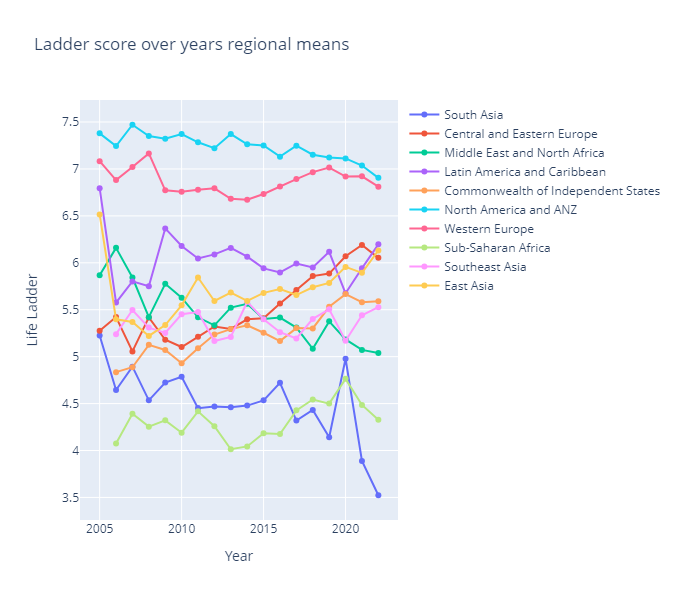

In [247]:
means_fig.update_layout(
    title = "Ladder score over years regional means",
    xaxis_title="Year",
    yaxis_title="Life Ladder",
    width = 800,
    height = 600
)
means_fig.show()